### Objective

- The primary objective is to conduct an analysis of Microsoft's stock performance spanning from January 1, 2013, to December 27, 2023. The goal is to develop a linear regression model. This model will harness historical stock data to predict future closing prices, thereby providing actionable insights for informed investment decisions and strategic planning.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # to split data into training and testing sets


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',500)
sns.set_style('darkgrid')

### Load Data

In [2]:
#load the data as df_msft

df_msft = pd.read_csv("data/MSFT.csv", index_col='Date', parse_dates=True)

In [3]:
df_msft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,27.250000,27.730000,27.150000,27.620001,22.574516,52899300
2013-01-03,27.629999,27.650000,27.160000,27.250000,22.272112,48294400
2013-01-04,27.270000,27.340000,26.730000,26.740000,21.855274,52521100
2013-01-07,26.770000,26.879999,26.639999,26.690001,21.814407,37110400
2013-01-08,26.750000,26.790001,26.459999,26.549999,21.699986,44703100


In [4]:
df_msft.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,373.679993,375.179993,372.709991,374.579987,374.579987,17091100
2023-12-26,375.000000,376.940002,373.500000,374.660004,374.660004,12673100
2023-12-27,373.690002,375.059998,372.809998,374.070007,374.070007,14905400
2023-12-28,375.369995,376.459991,374.160004,375.279999,375.279999,14327000
2023-12-29,376.000000,377.160004,373.480011,376.040009,376.040009,18723000


In [5]:
df_msft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2768 entries, 2013-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2768 non-null   float64
 1   High       2768 non-null   float64
 2   Low        2768 non-null   float64
 3   Close      2768 non-null   float64
 4   Adj Close  2768 non-null   float64
 5   Volume     2768 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 151.4 KB


In [6]:
df_msft.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2.768000e+03
mean,139.118212,140.500921,137.699050,139.171243,134.026909,3.183635e+07
std,102.591663,103.656363,101.486758,102.621768,103.477008,1.640070e+07
min,26.490000,26.750000,26.280001,26.459999,21.626423,7.425600e+06
25%,48.575002,48.917499,48.072501,48.579999,42.033782,2.221302e+07
50%,101.094997,101.805001,99.574997,101.085003,95.305713,2.787770e+07
75%,235.269997,238.005001,232.392498,235.532505,230.466889,3.639475e+07
max,383.760010,384.299988,378.160004,382.700012,382.700012,2.484285e+08


In [7]:
df_msft.duplicated().sum()

0

Text(0, 0.5, 'Open')

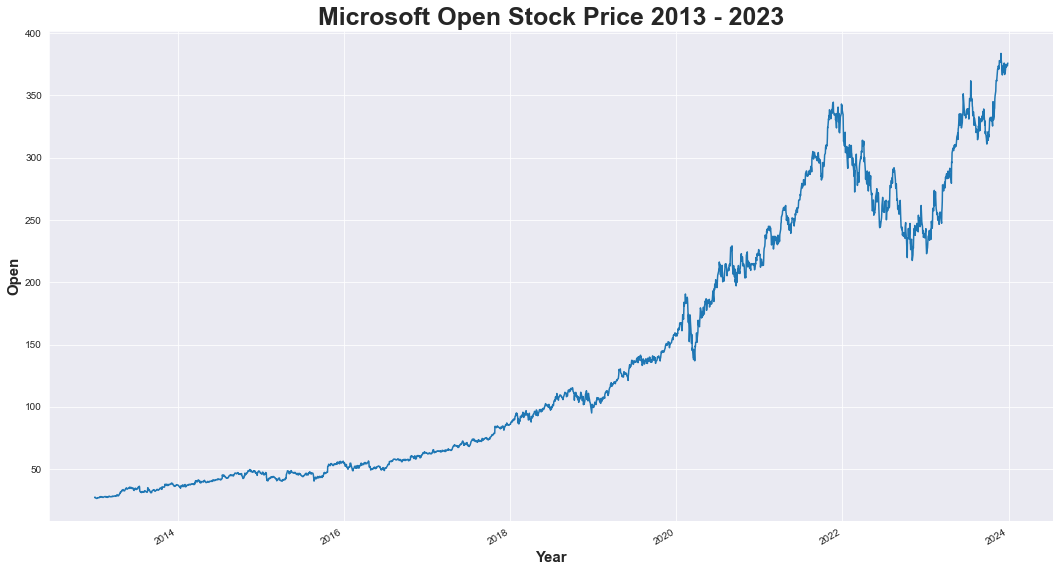

In [8]:
df_msft['Open'].plot(figsize=(18,10))
plt.title('Microsoft Open Stock Price 2013 - 2023', fontsize=25, fontweight='bold')
plt.xlabel("Year", fontsize=15, fontweight='bold')
plt.ylabel("Open", fontsize=15, fontweight='bold')

In [9]:
min = df_msft['Open']['2013-01-01':'2023-12-31'].min()
max = df_msft['Open']['2013-01-01':'2023-12-31'].max()

print(f"Lowest values {min} and Highest values {max}")

Lowest values 26.49 and Highest values 383.76001


The peak stock price of 383.76 within the observed period occurred on November 29, 2023, whereas the lowest was recorded at 26.49 on November 1, 2013.

(100.0, 400.0)

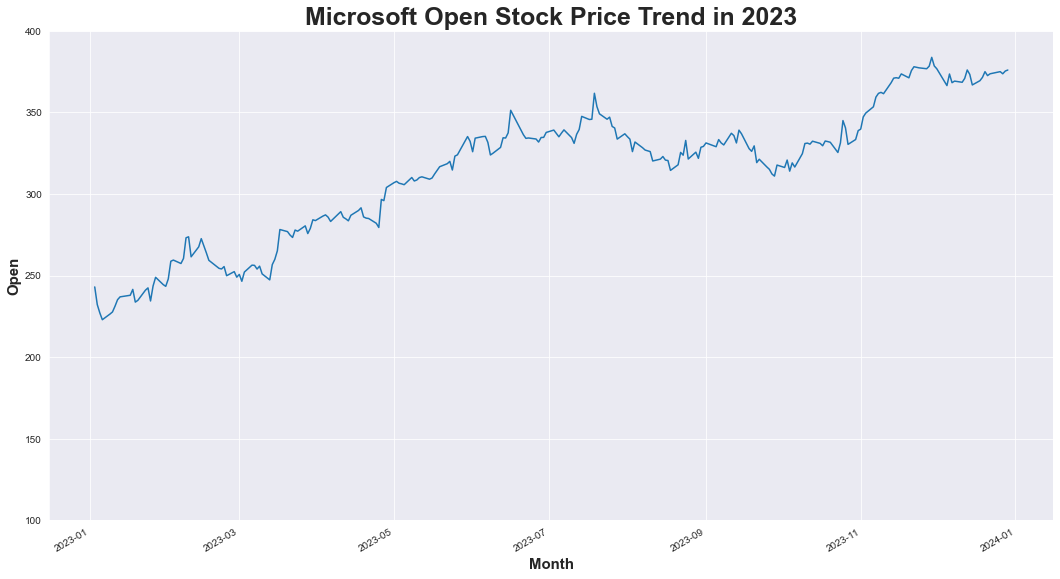

In [10]:
df_msft['Open']['2023-01-01':'2023-12-31'].plot(figsize=(18, 10))
plt.title('Microsoft Open Stock Price Trend in 2023', fontsize=25, fontweight='bold')
plt.xlabel("Month", fontsize=15, fontweight='bold')
plt.ylabel("Open", fontsize=15, fontweight='bold')
plt.ylim(100, 400)

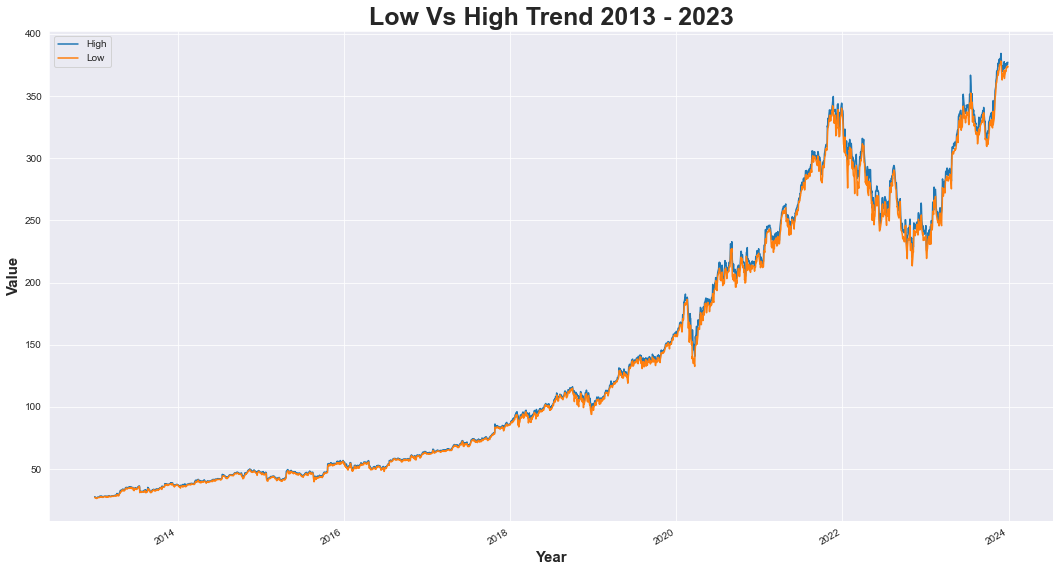

In [11]:
df_msft['High'].plot(figsize=(18,10), label='High')
df_msft['Low'].plot(figsize=(18,10), label='Low')
plt.title('Low Vs High Trend 2013 - 2023', fontsize=25, fontweight='bold')
plt.xlabel("Year", fontsize=15, fontweight='bold')
plt.ylabel("Value", fontsize=15, fontweight='bold')
plt.legend()
plt.show()

### Linear Regression

We will develop a model to forecast the closing stock price of Microsoft within this understudy period. This prediction will serve as an estimate for the subsequent day's opening stock value. Our model will utilize key variables to enhance accuracy.

In [12]:
df_msft = df_msft.reset_index()

In [13]:
df_msft.drop(['Date', 'Adj Close'], axis=1, inplace=True)

In [14]:
X = df_msft[['Open', 'High', 'Low', 'Volume']]

y = df_msft['Close']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [16]:
print('-----------------------------------------')
print('The X training set records')
display(X_train.shape)
print('-----------------------------------------')
print('The X test set records')
display(X_test.shape)
print('-----------------------------------------')
print('Number of records for X')
display(X.shape)
print('-----------------------------------------')

-----------------------------------------
The X training set records


(1937, 4)

-----------------------------------------
The X test set records


(831, 4)

-----------------------------------------
Number of records for X


(2768, 4)

-----------------------------------------


In [17]:
print('-----------------------------------------')
print('The y training set records')
display(y_train.shape)
print('-----------------------------------------')
print('The y test set records')
display(y_test.shape)
print('-----------------------------------------')
print('Number of records for y')
display(y.shape)
print('-----------------------------------------')

-----------------------------------------
The y training set records


(1937,)

-----------------------------------------
The y test set records


(831,)

-----------------------------------------
Number of records for y


(2768,)

-----------------------------------------


In [18]:
linreg = LinearRegression(fit_intercept=True, normalize=True)

linreg.fit(X_train, y_train)

linreg_pred = linreg.predict(X_test)

print ('Linear Regression R-Square Score ---------')
print ('')
print (linreg.score(X_test, y_test))
print('')
print ('---------------------------')

df_linreg = pd.DataFrame(linreg.coef_)
names = pd.DataFrame(list(X.columns))
df_linreg = pd.concat([names, df_linreg], axis = 1)
df_linreg.columns = ['Feature', 'linreg_coeff']
df_linreg = df_linreg.sort_values(by='linreg_coeff', ascending = False)
df_linreg

Linear Regression R-Square Score ---------

0.9999140509405208

---------------------------


,Feature,linreg_coeff
1,High,8.287704e-01
2,Low,8.253700e-01
3,Volume,-1.345202e-09
0,Open,-6.537896e-01


In [19]:
df_target = pd.DataFrame(y_test).reset_index()
display(df_target.head())
df_target.shape

,index,Close
0,1378,100.410004
1,839,49.779999
2,2164,289.459991
3,2619,331.209991
4,927,57.660000


(831, 2)

In [20]:
#calculate the residual for the linear regression

df_linreg_pred = pd.DataFrame(linreg_pred, columns = ['linreg_pred'])

df_results = pd.concat([df_target, df_linreg_pred], axis=1)
df_results['linreg_resid'] = df_results['Close'] - df_results['linreg_pred']
df_results

,index,Close,linreg_pred,linreg_resid
0,1378,100.410004,100.113773,0.296231
1,839,49.779999,49.835652,-0.055653
2,2164,289.459991,288.741133,0.718858
3,2619,331.209991,331.909413,-0.699422
4,927,57.660000,57.790099,-0.130099
...,...,...,...,...
826,1004,63.279999,63.995441,-0.715442
827,1624,132.850006,133.552448,-0.702442
828,1677,137.860001,136.880756,0.979245
829,858,53.000000,52.758756,0.241244


(<seaborn.axisgrid.FacetGrid at 0x2410d17a400>,)

<Figure size 1296x720 with 0 Axes>

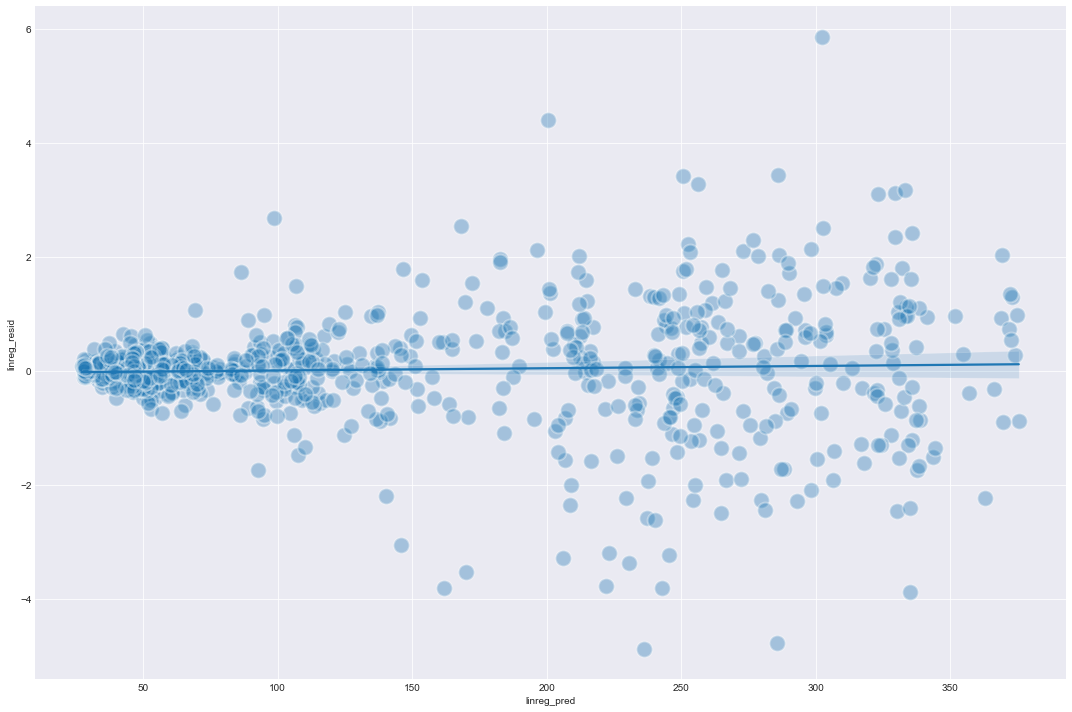

In [21]:
plt.style.use('seaborn-darkgrid') 

plt.figure(figsize=(18,10)) 
sns.lmplot(x='linreg_pred', y='linreg_resid', data = df_results, height=10,
           aspect = 1.5, scatter_kws={"alpha":0.35,"s":250,"linewidth":2,"edgecolor":"white"}),

In [22]:
from sklearn.metrics import mean_squared_error
linreg_mse = mean_squared_error(df_results['Close'], df_results['linreg_pred'])

linreg_rmse = linreg_mse ** .5
linreg_rmse

print(f"The Mean Squared Error is {linreg_mse}")

print(f"The Root Mean Squared Error is {linreg_rmse}")

The Mean Squared Error is 0.9108321376422258
The Root Mean Squared Error is 0.9543752603888188


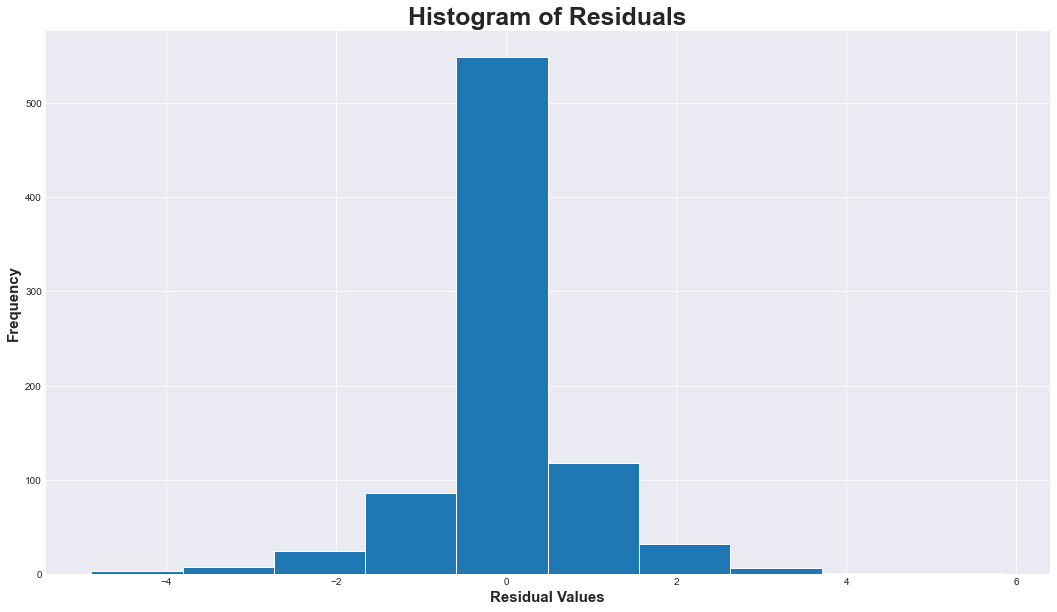

In [23]:
df_results['linreg_resid'].hist(figsize=(18,10))
plt.xlabel('Residual Values', fontsize=15, fontweight='bold')
plt.ylabel('Frequency', fontsize=15, fontweight='bold')
plt.title('Histogram of Residuals', fontsize=25, fontweight='bold')
plt.show()